In [1]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4904294891812761766
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 5618830656015690484
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]Metal device set to: Apple M1 Max



2022-08-24 02:01:53.403809: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-24 02:01:53.403911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [4]:
import pandas as pd

df = pd.read_excel("../01. 데이터/Data for headed bars_for DataFrame_220817.xlsx", skiprows = 17, engine = 'openpyxl')
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "ld", "fc", "db", "b", "cso,avg",
                                 "cbc", "csi", "n", "cb", "Ah/Ab", "fsu,test", "dtr", "ntr", "st"]) # st 제거시
df

,No.,Author,Year,Test type,Remark,Specimen,fy,ld,fc,db,...,"cso,avg",cbc,csi,n,cb,Ah/Ab,"fsu,test",dtr,ntr,st
0,1.0,Wright,NaN,Stub-beam,NaN,1-TH01-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.47,9.395954,376.153911,0.000,0.0,12.7
1,2.0,Wright,NaN,Stub-beam,NaN,1-TH02-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.39,9.395954,388.271356,0.000,0.0,12.7
2,3.0,Wright,NaN,Stub-beam,NaN,1-TH03-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,47.12,9.395954,364.470642,0.000,0.0,12.7
3,4.0,Wright,NaN,Stub-beam,NaN,2-TH04-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,47.96,9.395954,482.092746,9.500,3.0,127.0
4,5.0,Wright,NaN,Stub-beam,NaN,2-TH05-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,50.80,9.395954,462.692993,9.500,3.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,154.94,35.724138,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,457.241379,15.875,2.0,25.4
474,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,172.72,37.655172,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,466.896552,15.875,2.0,25.4
475,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,160.02,37.655172,25.4,...,774.70,774.70,NaN,1.0,NaN,5.100000,412.413793,15.875,3.0,25.4
476,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,167.64,37.655172,25.4,...,762.00,762.00,NaN,1.0,NaN,5.100000,488.275862,15.875,3.0,25.4


In [5]:
y= df["fsu,test"]
y

0      376.153911
1      388.271356
2      364.470642
3      482.092746
4      462.692993
          ...    
473    457.241379
474    466.896552
475    412.413793
476    488.275862
477    459.310345
Name: fsu,test, Length: 478, dtype: float64

In [6]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        431 non-null    float64
 1   Author     463 non-null    object 
 2   Year       398 non-null    float64
 3   Test type  463 non-null    object 
 4   Remark     206 non-null    object 
 5   Specimen   463 non-null    object 
 6   fy         463 non-null    float64
 7   ld         463 non-null    float64
 8   fc         463 non-null    float64
 9   db         463 non-null    float64
 10  b          463 non-null    float64
 11  cso,avg    463 non-null    float64
 12  cbc        422 non-null    float64
 13  csi        431 non-null    float64
 14  n          463 non-null    float64
 15  cb         427 non-null    float64
 16  Ah/Ab      463 non-null    float64
 17  fsu,test   440 non-null    float64
 18  dtr        438 non-null    float64
 19  ntr        438 non-null    float64
 20  st        

In [7]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "ld", "fc", "db", "b", "cso,avg","cbc", "csi", "n", "cb", "Ah/Ab", "dtr", "ntr", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인

Joint type    297
CCT            52
Lap splice     49
Stub-beam      33
Pullout        32
Name: Test type, dtype: int64


In [8]:
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.47,9.395954,0.000,0.0,12.7,0,0,0,0,1
1,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.39,9.395954,0.000,0.0,12.7,0,0,0,0,1
2,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,47.12,9.395954,0.000,0.0,12.7,0,0,0,0,1
3,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,47.96,9.395954,9.500,3.0,127.0,0,0,0,0,1
4,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,50.80,9.395954,9.500,3.0,127.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,889.655172,154.94,35.724138,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
474,889.655172,172.72,37.655172,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
475,889.655172,160.02,37.655172,25.4,1524.0,774.70,774.70,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0
476,889.655172,167.64,37.655172,25.4,1524.0,762.00,762.00,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0


In [9]:
y2 = y[~y.isnull()]
y2

0      376.153911
1      388.271356
2      364.470642
3      482.092746
4      462.692993
          ...    
473    457.241379
474    466.896552
475    412.413793
476    488.275862
477    459.310345
Name: fsu,test, Length: 440, dtype: float64

In [10]:
X = X[~y.isnull()]
X

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.47,9.395954,0.000,0.0,12.7,0,0,0,0,1
1,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.39,9.395954,0.000,0.0,12.7,0,0,0,0,1
2,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,47.12,9.395954,0.000,0.0,12.7,0,0,0,0,1
3,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,47.96,9.395954,9.500,3.0,127.0,0,0,0,0,1
4,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,50.80,9.395954,9.500,3.0,127.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,889.655172,154.94,35.724138,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
474,889.655172,172.72,37.655172,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
475,889.655172,160.02,37.655172,25.4,1524.0,774.70,774.70,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0
476,889.655172,167.64,37.655172,25.4,1524.0,762.00,762.00,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0


In [11]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
pd.options.display.max_rows=None

X.dropna(inplace = True)
X


/var/folders/y2/ps98_m_9589fjsw1g7x77n2h0000gn/T/ipykernel_97191/230907408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace = True)


,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.470000,9.395954,0.000,0.0,12.700,0,0,0,0,1
1,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.390000,9.395954,0.000,0.0,12.700,0,0,0,0,1
2,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.120000,9.395954,0.000,0.0,12.700,0,0,0,0,1
3,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.960000,9.395954,9.500,3.0,127.000,0,0,0,0,1
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,9.500,3.0,127.000,0,0,0,0,1
5,517.500000,292.100,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.730000,9.395954,9.500,3.0,127.000,0,0,0,0,1
6,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
7,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
8,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,49.480000,9.395954,0.000,0.0,289.052,0,0,0,0,1
9,517.500000,285.750,33.440000,25.400,229.00,101.80,305.000000,0.000000,1.0,82.190000,9.395954,9.500,3.0,76.000,0,0,0,0,1


In [12]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

0       376.153911
1       388.271356
2       364.470642
3       482.092746
4       462.692993
5       453.476630
6       293.542144
7       307.317351
8       330.585213
9       480.257367
10      486.138473
11      445.325971
12      451.562310
13      446.549556
14      447.417907
15      533.108373
16      518.622698
17      517.221495
18      524.859038
19      504.827757
20      485.526680
21      510.274686
22      499.834738
23      490.618375
24      492.631371
25      457.601298
26      507.472281
27      515.978174
28      520.813311
29      527.404886
30      490.697316
31      502.281909
32      523.280218
33      426.000000
34      456.000000
35      471.000000
36      451.000000
37      319.000000
38      386.000000
39      458.000000
40      458.000000
41      472.000000
42      472.000000
43        0.000000
44        0.000000
45      420.000000
46      472.000000
47      413.000000
48      458.000000
49      421.000000
50      459.000000
51      413.000000
52      471.

In [13]:
# y2 = 0인 값을 제거. 
y2 = y2.loc[(y2 != 0)]
y2

0       376.153911
1       388.271356
2       364.470642
3       482.092746
4       462.692993
5       453.476630
6       293.542144
7       307.317351
8       330.585213
9       480.257367
10      486.138473
11      445.325971
12      451.562310
13      446.549556
14      447.417907
15      533.108373
16      518.622698
17      517.221495
18      524.859038
19      504.827757
20      485.526680
21      510.274686
22      499.834738
23      490.618375
24      492.631371
25      457.601298
26      507.472281
27      515.978174
28      520.813311
29      527.404886
30      490.697316
31      502.281909
32      523.280218
33      426.000000
34      456.000000
35      471.000000
36      451.000000
37      319.000000
38      386.000000
39      458.000000
40      458.000000
41      472.000000
42      472.000000
45      420.000000
46      472.000000
47      413.000000
48      458.000000
49      421.000000
50      459.000000
51      413.000000
52      471.000000
53      376.000000
54      460.

In [14]:
X = X.loc[y2.index] # y=0인 index의 X값도 제거
X

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.470000,9.395954,0.000,0.0,12.700,0,0,0,0,1
1,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.390000,9.395954,0.000,0.0,12.700,0,0,0,0,1
2,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.120000,9.395954,0.000,0.0,12.700,0,0,0,0,1
3,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.960000,9.395954,9.500,3.0,127.000,0,0,0,0,1
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,9.500,3.0,127.000,0,0,0,0,1
5,517.500000,292.100,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.730000,9.395954,9.500,3.0,127.000,0,0,0,0,1
6,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
7,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
8,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,49.480000,9.395954,0.000,0.0,289.052,0,0,0,0,1
9,517.500000,285.750,33.440000,25.400,229.00,101.80,305.000000,0.000000,1.0,82.190000,9.395954,9.500,3.0,76.000,0,0,0,0,1


In [15]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [16]:
# Train, Valid, Test Set으로 분류

In [17]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [18]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(142)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20, random_state=142)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288, 19), (73, 19), (288,), (73,))

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 354 to 347
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fy                    288 non-null    float64
 1   ld                    288 non-null    float64
 2   fc                    288 non-null    float64
 3   db                    288 non-null    float64
 4   b                     288 non-null    float64
 5   cso,avg               288 non-null    float64
 6   cbc                   288 non-null    float64
 7   csi                   288 non-null    float64
 8   n                     288 non-null    float64
 9   cb                    288 non-null    float64
 10  Ah/Ab                 288 non-null    float64
 11  dtr                   288 non-null    float64
 12  ntr                   288 non-null    float64
 13  st                    288 non-null    float64
 14  Test_type_CCT         288 non-null    uint8  
 15  Test_type_Joint type 

In [20]:
print(X_train["Test_type_CCT"].value_counts())
print(X_train["Test_type_Lap splice"].value_counts())
print(X_train["Test_type_Joint type"].value_counts())
print(X_train["Test_type_Stub-beam"].value_counts())
#print(X_train["Test type"].value_counts()) # 범주 갯수 확인

0    252
1     36
Name: Test_type_CCT, dtype: int64
0    282
1      6
Name: Test_type_Lap splice, dtype: int64
1    222
0     66
Name: Test_type_Joint type, dtype: int64
0    264
1     24
Name: Test_type_Stub-beam, dtype: int64


In [21]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=142)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, 

((230, 19), (58, 19), (230,), (58,))

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler


scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

In [24]:
X_train

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
291,799.310345,368.300,38.413793,25.400,429.26,63.50,76.200000,66.886667,4.0,260.350000,10.100000,9.525,10.0,76.200,0,1,0,0,0
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,9.500,3.0,127.000,0,0,0,0,1
325,889.655172,309.118,85.241379,25.400,381.00,63.50,76.200000,50.800000,4.0,260.350000,10.100000,0.000,0.0,309.118,0,1,0,0,0
384,931.034483,304.800,27.310345,35.814,543.56,60.96,93.980000,350.012000,2.0,508.000000,4.800000,12.700,4.0,203.200,0,1,0,0,0
322,889.655172,309.118,83.034483,25.400,386.08,66.04,73.660000,88.900000,3.0,260.350000,5.100000,12.700,10.0,76.200,0,1,0,0,0
395,889.655172,256.540,33.655172,25.400,444.50,68.58,80.010000,256.540000,2.0,508.000000,5.100000,12.700,10.0,127.000,0,1,0,0,0
61,433.000000,381.000,28.000000,36.000,215.90,89.95,50.800000,0.000000,1.0,83.600000,2.560000,0.000,0.0,252.000,1,0,0,0,0
282,827.586207,365.252,37.379310,25.400,434.34,64.77,85.090000,254.000000,2.0,260.350000,10.500000,9.525,10.0,76.200,0,1,0,0,0
396,889.655172,252.476,33.655172,25.400,439.42,66.04,82.550000,256.540000,2.0,508.000000,10.100000,12.700,10.0,127.000,0,1,0,0,0
415,799.310345,435.102,74.896552,35.814,556.26,71.12,99.060000,342.392000,2.0,508.000000,5.500000,0.000,0.0,435.102,0,1,0,0,0


### 데이터 분포

In [25]:
X_train_y_train = X_train
X_valid_y_valid = X_valid
X_test_y_test = X_test

In [26]:
X_train_y_train["y"] = y_train
X_valid_y_valid["y"] = y_valid
X_test_y_test["y"] = y_test

In [27]:
X_train_y_train.corr()

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam,y
fy,1.000000,-0.210739,0.167699,-0.307873,0.517864,-0.257657,-0.213943,0.430093,0.657583,0.466226,0.153835,0.208707,0.384743,-0.060731,-0.413599,0.608682,-0.054698,NaN,-0.402226,0.413114
ld,-0.210739,1.000000,-0.320546,0.709259,0.220534,0.118207,-0.218849,0.134619,-0.085090,0.374016,-0.153039,0.085597,-0.030586,0.557076,0.157234,-0.040811,-0.068099,NaN,-0.093445,-0.071444
fc,0.167699,-0.320546,1.000000,-0.104031,0.162349,-0.585985,-0.236558,0.320185,0.246240,-0.111751,0.025787,0.007426,0.003522,-0.144706,-0.295160,0.367299,-0.048922,NaN,-0.178524,0.374107
db,-0.307873,0.709259,-0.104031,1.000000,0.413009,0.016778,-0.192911,0.383104,-0.089519,0.417606,-0.261530,0.079451,-0.078206,0.520272,-0.055040,0.146345,-0.118097,NaN,-0.095431,-0.299974
b,0.517864,0.220534,0.162349,0.413009,1.000000,-0.119813,-0.219219,0.749648,0.519047,0.587668,-0.075854,0.179952,0.213862,0.296130,-0.471589,0.537845,0.235543,NaN,-0.375965,0.149451
"cso,avg",-0.257657,0.118207,-0.585985,0.016778,-0.119813,1.000000,0.672117,-0.413549,-0.271997,-0.032232,0.147585,0.079536,0.072663,-0.049972,-0.007216,-0.416278,0.098185,NaN,0.597758,-0.253033
cbc,-0.213943,-0.218849,-0.236558,-0.192911,-0.219219,0.672117,1.000000,-0.371549,-0.279858,-0.232077,0.313956,0.149016,0.102373,-0.293260,-0.271376,-0.390622,0.062067,NaN,0.900554,-0.240517
csi,0.430093,0.134619,0.320185,0.383104,0.749648,-0.413549,-0.371549,1.000000,0.104320,0.515919,-0.077720,0.170327,0.160143,0.230136,-0.377962,0.612985,-0.133851,NaN,-0.410518,0.309037
n,0.657583,-0.085090,0.246240,-0.089519,0.519047,-0.271997,-0.279858,0.104320,1.000000,0.304911,0.001601,0.099611,0.213382,0.058916,-0.390008,0.541275,0.176485,NaN,-0.449767,0.170240
cb,0.466226,0.374016,-0.111751,0.417606,0.587668,-0.032232,-0.232077,0.515919,0.304911,1.000000,0.041693,0.274465,0.343394,0.272107,-0.410077,0.619682,-0.187260,NaN,-0.353248,-0.078047


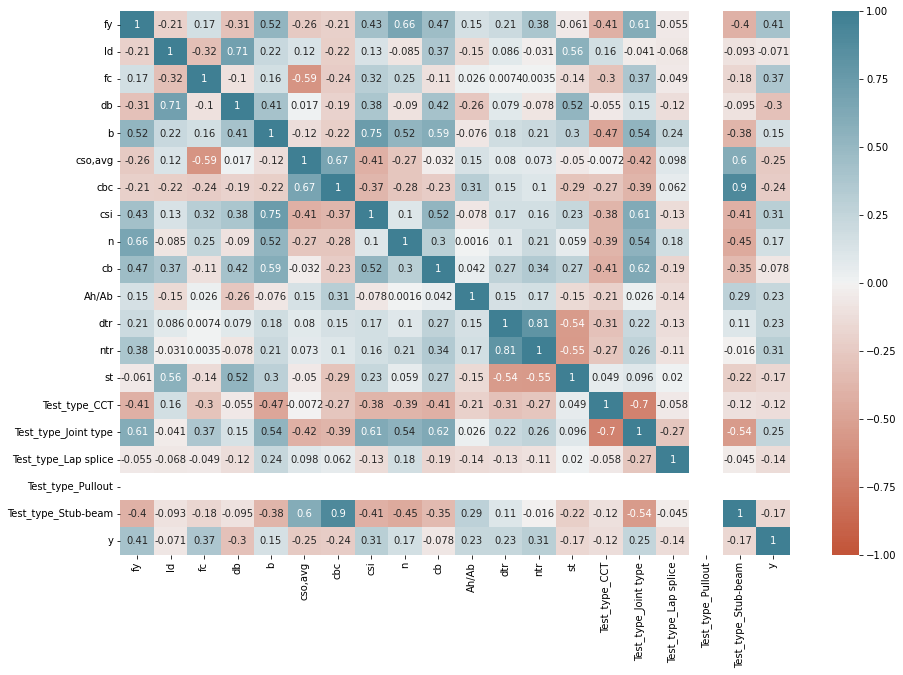

In [28]:
fig= plt.figure(figsize = (15, 10))
ax = sns.heatmap(X_train_y_train.corr(),
                vmin=-1, vmax=1, center= 0,
                cmap=sns.diverging_palette(20, 220, n = 200), 
                annot=True,
                square=False)
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right')

/Users/baekjw/miniforge3/envs/tftest2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

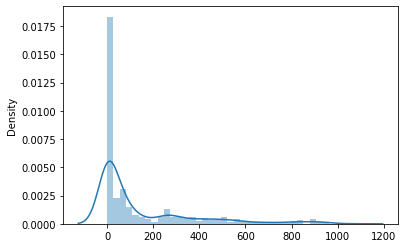

In [29]:
sns.distplot(X_train_y_train)

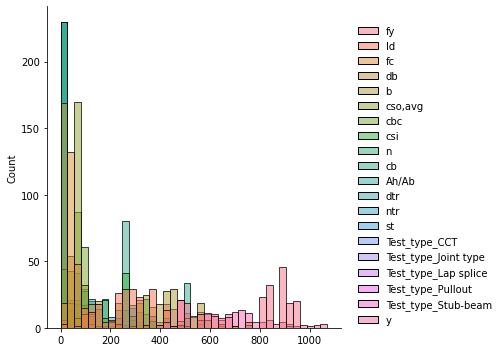

In [30]:
sns.displot(data=X_train_y_train)

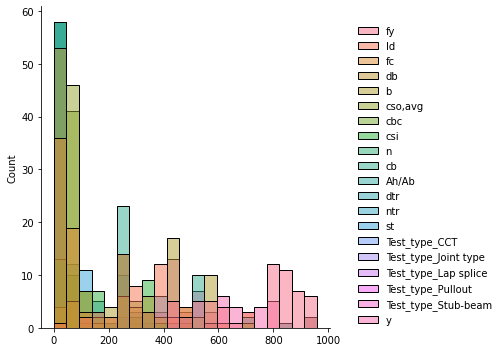

In [31]:
sns.displot(data=X_valid_y_valid)

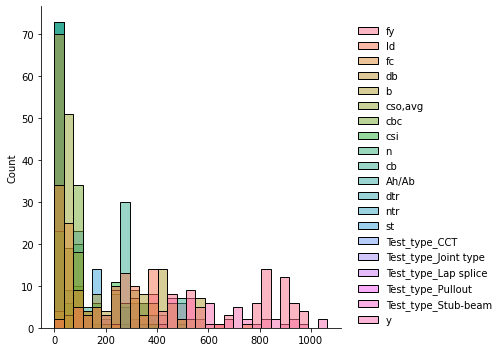

In [32]:
sns.displot(data=X_test_y_test)

/Users/baekjw/miniforge3/envs/tftest2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

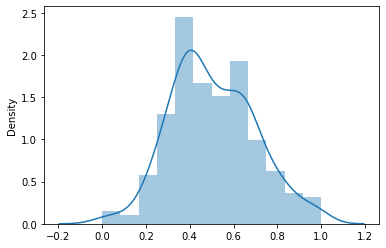

In [33]:
sns.distplot(y_train_scaled)

In [34]:
from IPython.core.debugger import set_trace
#set_trace()

In [35]:
##층을 여기서 더 추가하거나 하여도 오히려 성능이 더 떨어지는 결과가 나옵니다.
# Set random seed
tf.random.set_seed(42)
num_node1 = 3000
num_node2 = 1250
num_node3 = 375
num_node4 = 100
#num_node5 = 50
#num_node6 = 60

# 1. Create a model  --> 일단 현재 네트워크 사용: 최종 네트워크는 실험을 통해 결정(성능 vs 비용 비교하여 효율적인 방향으로 설정)
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(num_node1, activation='relu'),  # 3000
           tf.keras.layers.Dense(num_node2, activation='relu'),  # 1250
           tf.keras.layers.Dense(num_node3, activation='relu'),   # 375
           tf.keras.layers.Dense(num_node4, activation='relu'),   # 100
           #tf.keras.layers.Dense(num_node5, activation='relu'),   # 100
           #tf.keras.layers.Dense(num_node6, activation='relu'),   # 100
           tf.keras.layers.Dense(1, activation='linear')
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mse,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['mse'])



# 3. Fit the model
history = model_1.fit(X_train_scaled, 
                      y_train_scaled, 
                      epochs=1000,    # Load가 크지 않은 문제이므로, 충분히 학습할 것(즉, Underfitting이 되지 않도록 할 것). 
                      verbose = 0,
                      # 단, Overfitting이 발생하면 더이상 학습할 필요가 없음. 
                      #validation_split = 0.1)
                      validation_data=(X_valid_scaled, y_valid_scaled))

2022-08-24 02:01:58.200664: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-24 02:01:58.200685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-24 02:01:58.253731: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-24 02:01:58.537039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-24 02:01:59.329116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [36]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              60000     
                                                                 
 dense_1 (Dense)             (None, 1250)              3751250   
                                                                 
 dense_2 (Dense)             (None, 375)               469125    
                                                                 
 dense_3 (Dense)             (None, 100)               37600     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4,318,076
Trainable params: 4,318,076
Non-trainable params: 0
_________________________________________________________________


In [37]:
y_p = model_1.predict(X_test_scaled)
y_test_unscaled = scY.inverse_transform(y_test_scaled)
y_p_unscaled = scY.inverse_transform(y_p)
X_test_unscaled = scX.inverse_transform(X_test_scaled)

score = model_1.evaluate(X_test_scaled, y_test_scaled)

from sklearn.metrics import r2_score
r2 = r2_score(y_test_unscaled, y_p_unscaled)

division = y_p_unscaled / y_test_unscaled
cov = np.std(division) / np.mean(division)
print(f"average = {division}")
print(f"cov = {cov}")
print(f"R2 score = {r2}")

1/3 [=========>....................] - ETA: 0s - loss: 0.0034 - mse: 0.0034

2022-08-24 02:03:18.991162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 13ms/step - loss: 0.0034 - mse: 0.0034
average = [[1.1464544 ]
 [0.99540442]
 [0.92840668]
 [0.90196875]
 [0.97193224]
 [0.93988077]
 [1.1166207 ]
 [0.98070346]
 [1.04229765]
 [1.3012072 ]
 [1.01338212]
 [1.15648157]
 [0.99341237]
 [1.00724006]
 [0.97120529]
 [0.88608972]
 [1.00848333]
 [0.89108756]
 [1.32708131]
 [0.96958356]
 [0.98000167]
 [1.20151593]
 [0.97912494]
 [0.94770271]
 [1.05817142]
 [1.09036353]
 [1.01130619]
 [1.05779233]
 [0.86594914]
 [1.28539224]
 [0.92127513]
 [0.99828627]
 [0.92825998]
 [1.00099862]
 [0.91346825]
 [0.92474728]
 [1.02703616]
 [0.91547   ]
 [0.83372351]
 [0.98403654]
 [0.84829681]
 [1.02296236]
 [1.14081574]
 [1.24847803]
 [1.03759993]
 [1.03208299]
 [0.9826454 ]
 [0.98946717]
 [1.02527799]
 [0.96884588]
 [1.06478346]
 [0.86216399]
 [0.98167199]
 [0.99303583]
 [0.96847776]
 [1.01685355]
 [1.30763825]
 [1.04397179]
 [0.97332806]
 [1.18112699]
 [1.06190927]
 [1.06364954]
 [0.98357853]
 [1.08762972]
 [1.04427991]

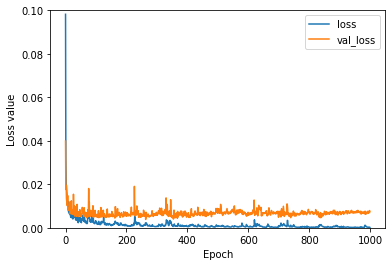

In [38]:
ax = pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
ax.set_ylabel("Loss value")
ax.set_xlabel("Epoch")
ax.set_ylim([0, 0.1])
# 그림의 저장
plt.show()
#plt.savefig("modelsave/Model"+f"Node1:{str(num_node1)}"+f"Node2:{str(num_node2)}"+f"Node3:{str(num_node3)}"+f"Node4:{str(num_node4)}.jpg")


/var/folders/y2/ps98_m_9589fjsw1g7x77n2h0000gn/T/ipykernel_97191/1370615018.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


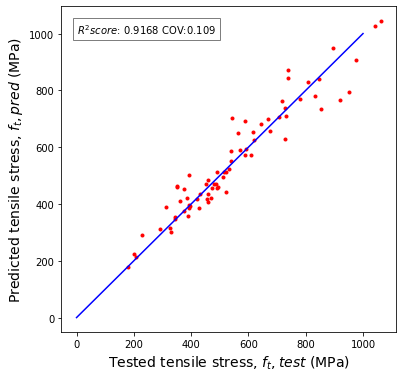

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(y_test_unscaled, y_p_unscaled, 'r.')
ax.set_xlabel("Tested tensile stress, $f_t,test$ (MPa)", fontsize = 14)
ax.set_ylabel("Predicted tensile stress, $f_t,pred$ (MPa)", fontsize = 14)
x = np.linspace(0, 1000, 100)
y = x
ax.plot(x, y, 'b')

plt.text(2, 1000, f"$R^2 score$: {r2:0.4f} COV:{cov:0.3f}", bbox=dict(facecolor='white', alpha=0.5))

fig.show()
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "comparison.jpg")

### Comparison of Performance with existing codes

In [40]:
y_p

array([[0.7767319 ],
       [0.3531231 ],
       [0.83764714],
       [0.32046643],
       [0.50527966],
       [0.50484574],
       [0.16075277],
       [0.45700756],
       [0.4061605 ],
       [0.6371299 ],
       [0.2836771 ],
       [0.58315605],
       [0.4468502 ],
       [0.5282111 ],
       [0.6416256 ],
       [0.3418624 ],
       [0.5572188 ],
       [0.354742  ],
       [0.39869383],
       [0.5883947 ],
       [0.32046643],
       [0.38654435],
       [0.40485352],
       [0.36990872],
       [0.6130332 ],
       [0.5211092 ],
       [0.37012178],
       [0.87903017],
       [0.56275934],
       [0.43698612],
       [0.29325756],
       [0.6384606 ],
       [0.39308813],
       [0.31078106],
       [0.23799309],
       [0.3894993 ],
       [0.15135214],
       [0.35160476],
       [0.72542125],
       [0.44677106],
       [0.37829766],
       [0.48424226],
       [0.34711483],
       [0.3254337 ],
       [0.523986  ],
       [0.29145852],
       [0.9739299 ],
       [0.770

In [41]:
def compute_ACI(variables):
    return variables["ld"]/variables["db"]*variables["fc"]**0.5/0.19    

In [42]:
def compute_ld_db(variables):
    return variables["ld"] / variables["db"]    

In [43]:
X_test_unscaled

array([[799.31034483, 277.876     ,  40.68965517, ...,   0.        ,
          0.        ,   0.        ],
       [472.        , 381.        ,  21.        , ...,   0.        ,
          0.        ,   0.        ],
       [889.65517241, 304.038     ,  83.31034483, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [433.        , 381.        ,  28.        , ...,   0.        ,
          0.        ,   0.        ],
       [799.31034483, 285.75      ,  37.93103448, ...,   0.        ,
          0.        ,   0.        ],
       [827.5862069 , 357.632     ,  68.55172414, ...,   0.        ,
          0.        ,   0.        ]])

In [44]:
y_ACI = compute_ACI(X_test)
ld_db = compute_ld_db(X_test)

In [45]:
def plot_comparison(y_test, y_pred, x, variables, hue):
    ratio = y_test / y_pred    
    avg = np.mean(ratio)    
    cov = np.std(ratio) / avg    
    
    ax = sns.scatterplot(data = variables, x = x, y = ratio, hue = hue)
    ax.set_ylim([0, 5])
    ax.set_xlim([0,30])
    xx = np.linspace(0,50)
    yy = np.ones_like(xx)
    ax.plot(xx, yy, 'r--')
    ax.text(0.5, 4.7, f"Avg$: {avg:0.4f} CoV:{cov:0.3f}", bbox=dict(facecolor='white', alpha=0.5))
    ax.set_xlabel("Development length divided by bar diameter $l_d/d_b$")
    ax.set_ylabel("Ratio of $ft,test / ft_pred$")
    #plt.plot(x, ratio, 'r.')
    
    
    return avg, cov

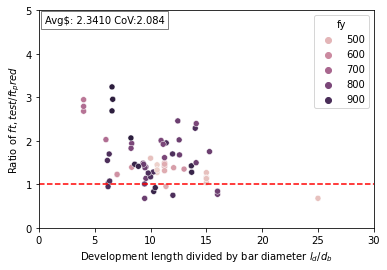

In [46]:
ACI_plot_fy = plot_comparison(y_test, y_ACI, ld_db, X_test, "fy")

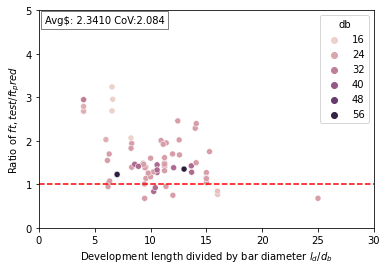

In [47]:
ACI_plot_test_type = plot_comparison(y_test, y_ACI, ld_db, X_test, "db" )

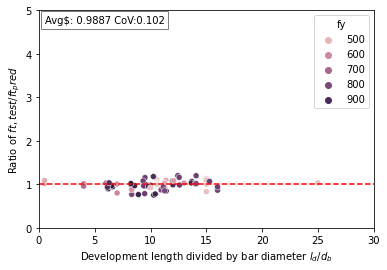

In [48]:
ANN_plot_fy = plot_comparison(y_test, np.squeeze(y_p_unscaled), ld_db, X_test, "fy")

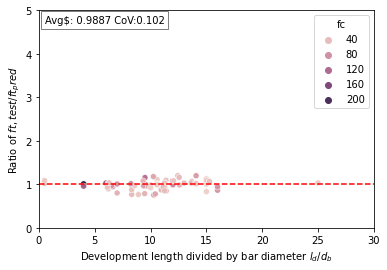

In [49]:
ANN_plot_fc = plot_comparison(y_test, np.squeeze(y_p_unscaled), ld_db, X_test, "fc")